In [1]:
#Importing packages we need
import numpy as np
from numpy import genfromtxt #This is used to loading a csv-file as a numpy array
import matplotlib.pyplot as plt #pyplot is used to plot the data

In [36]:
#Locate my folder
folder=''
data=np.genfromtxt(folder+'simulated_data.csv', delimiter=',',) #loading in first 4 columns
y = data[1:,1:2]# 100 times log-returns of the S&P 500 index. January 4, 2010 - till end

y = y.T[0,:] #unpacking numpy array
print(y)
T = len(y) #length of time series
M = 200 # Number of iterations.
pStar = np.zeros(T) # Smoothed state probabilities.
volStar = np.zeros(T) #Smoothed volatility.
logLik = 0 #Value of EM log-likelihood.
parVec  = np.zeros([M, 3]) # Vector for storing parameters.
likVec  = np.zeros(M)# Vector for storing log likelihoods.

# Initial parameter values.
sigmaH_sq = 2 #Variance for state 1 (= H, h1^2).
sigmaL_sq = 1 #Variance for state 2	(= L, h2^2).
p = 0.5 #Probability for s_t = 1 (=H).

#EM Estimation.
for m in range(M):
    #Reset logLik from previous iteration.
    logLik = 0
    for t in range(T):
        f1 = np.exp(-y[t]**2/(2*sigmaH_sq))/np.sqrt(2*np.pi*sigmaH_sq)#// Density of y_t in state 1.
        f2 = np.exp(-y[t]**2/(2*sigmaL_sq))/np.sqrt(2*np.pi*sigmaL_sq)#// Density of y_t in state 1.
        pStar[t] = (f1*p)/(f1*p+f2*(1-p)) #// Smoothed state probability for time t.
    #"Maximize step (M-step)" - Updating equations.
    sigmaH_sq = np.sum(pStar*y**2)/np.sum(pStar) #// Estimate of sigmaH_sq.
    sigmaL_sq = np.sum((1-pStar)*y**2)/np.sum(1-pStar) # Estimate of sigmaL_sq.
    p = np.sum(pStar)/T # Estimate of p.
    # Compute maximized EM log-likelihood value.
    for t in range(T):
        f1 = np.exp(-y[t]**2/(2*sigmaH_sq))/np.sqrt(2*np.pi*sigmaH_sq)#// Density of y_t in state 1.
        f2 = np.exp(-y[t]**2/(2*sigmaL_sq))/np.sqrt(2*np.pi*sigmaL_sq)#// Density of y_t in state 1.
        pStar[t] = (f1*p)/(f1*p+f2*(1-p)) #// Smoothed state probability for time t.
        logLik = logLik + pStar[t]*(np.log(f1)+np.log(p)) + (1-pStar[t])*(np.log(f2)+np.log(1-p))
        volStar[t] =np.sqrt(sigmaH_sq)*pStar[t] + np.sqrt(sigmaL_sq)*(1-pStar[t])
    #// Save estimates for iteration m.
    parVec[m][0] = sigmaH_sq
    parVec[m][1] = sigmaL_sq
    parVec[m][2] = p
    likVec[m] = logLik


[-6.43577584e+00 -7.05468456e+00 -9.78909209e-01  3.10350168e+00
 -3.23063306e+00 -4.05199598e+00  2.45061689e+00  5.37689354e+00
  3.01287011e+00 -2.55307255e+00 -2.16963077e+00  1.89724482e-01
 -7.14429227e-01  5.26908692e+00  3.93220686e+00 -6.04433407e+00
  5.36636750e+00 -1.12036624e-02  1.98743050e+00  3.58495611e+00
 -2.43225526e-01 -3.63757313e-01 -1.27676843e+00  6.82546292e+00
  4.13165985e+00  4.01332998e+00 -3.80582067e+00  8.21894991e+00
 -3.95094134e+00 -4.42776013e+00  6.29254659e+00  1.93348049e+00
  2.75110300e-01 -2.03425336e+00  5.85894841e+00  3.53247606e-01
  1.50331036e-01  1.99398647e-01 -6.66217309e-02  1.31751112e-01
 -5.78809917e-02 -1.32147252e-01 -1.20520477e-01 -2.17658111e-01
 -1.45405512e-01  1.05990095e-01  2.13864040e-01  1.29360197e-01
 -2.11149173e-01 -3.92487309e-01  3.58961674e-02  5.87278819e-02
 -3.19874573e-01 -4.51816871e-02  2.91978365e-01  5.11380624e-02
  2.26829610e-01  1.31075428e-01  9.48255902e-02  8.34207868e-02
  1.61402877e-01  9.41357

/tmp/ipykernel_239690/2634012819.py:38: RuntimeWarning: divide by zero encountered in log
  logLik = logLik + pStar[t]*(np.log(f1)+np.log(p)) + (1-pStar[t])*(np.log(f2)+np.log(1-p))
/tmp/ipykernel_239690/2634012819.py:38: RuntimeWarning: invalid value encountered in scalar multiply
  logLik = logLik + pStar[t]*(np.log(f1)+np.log(p)) + (1-pStar[t])*(np.log(f2)+np.log(1-p))


In [37]:
likVec #iterations

array([-2740.34628235, -2524.19630491, -2370.23915329, -2277.74196796,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [38]:
#Printed estimates and log likelihood value
print('sigma_H='+str(parVec[-1][0]))
print('sigma_L='+str(parVec[-1][1]))
print('p='+str(parVec[-1][2]))
print('loglikelihood function: '+str(likVec[-1]))


sigma_H=17.462387095725415
sigma_L=0.03793703035401055
p=0.5656186705815051
loglikelihood function: nan


In [39]:
#Compute the switching variable, s_t.
ZeroOnes=np.zeros(T) #State variable
for t in range(T):
    if(pStar[t]>0.5): # If smoothed transition prob. is higher than 50 pct., then set s_t = 1, othereise s_t = 0.
        ZeroOnes[t] = 1

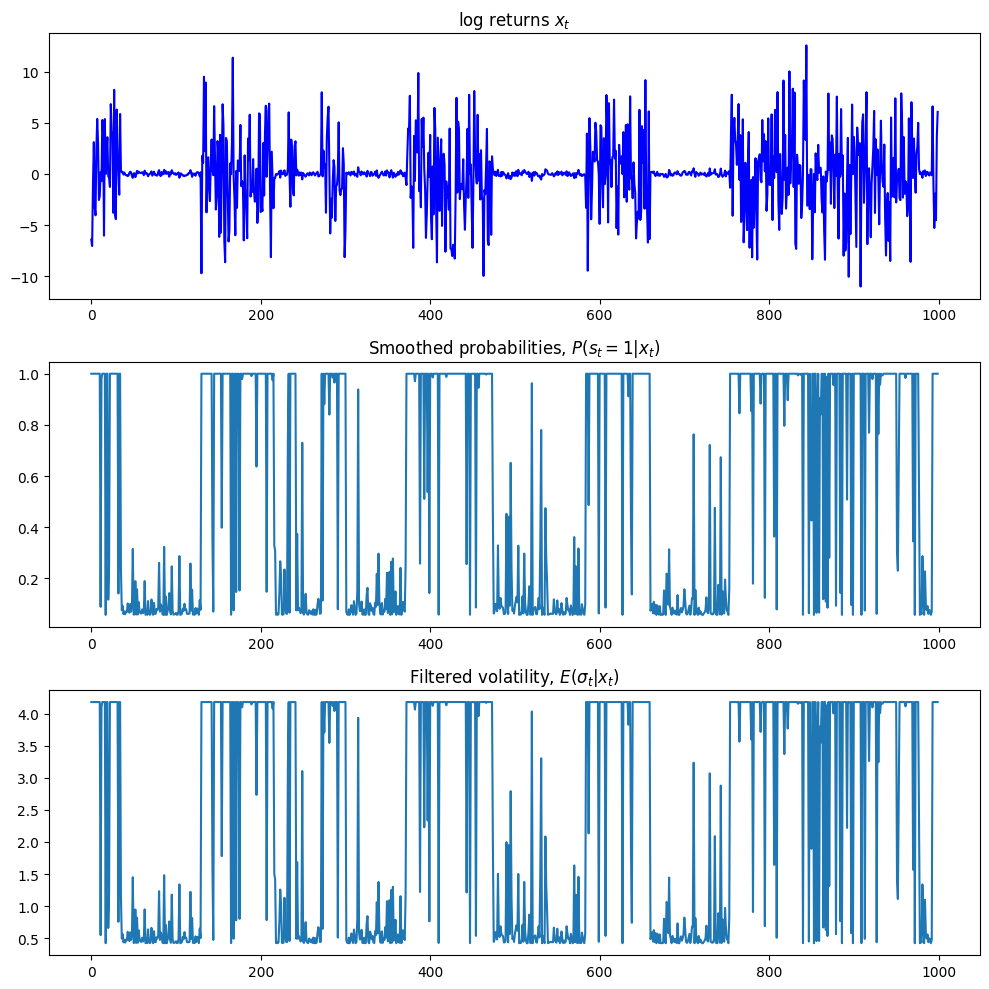

In [40]:
# Graph simulated observations and hidden states.
t=np.arange(0,T)
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].plot(t, y, color='b')
#axs[0].axhline(linewidth=1, color='k')
axs[0].set_title('log returns $x_t$')

axs[1].plot(t, pStar)
axs[1].set_title('Smoothed probabilities, $P(s_t=1|x_t)$')

axs[2].plot(t, volStar)
axs[2].set_title('Filtered volatility, $E(\sigma_t|x_t)$')

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()

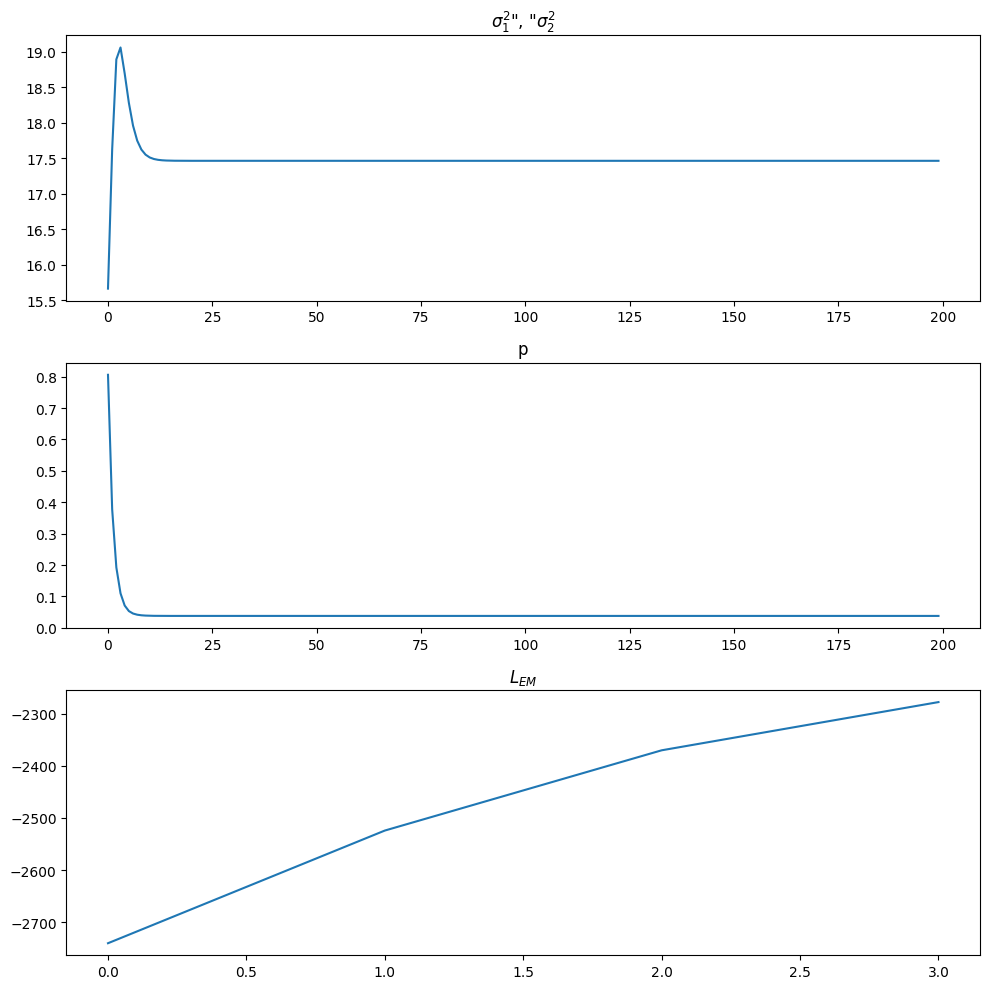

In [41]:
#Graph estimation: parameters and logLik.
m=np.arange(0,M)
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].plot(m, parVec[:,0])
axs[0].set_title('$\sigma_1^2$", "$\sigma_2^2$')

axs[1].plot(m, parVec[:,1])
axs[1].set_title('p')

axs[2].plot(m, likVec[:])
axs[2].set_title('$L_{EM}$')

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()